# Taller 2

## Machine Learning - Aprendizaje Supervisado

En el taller anterior su trabajo con un dataset que se ha descargado desde los proporcionados por scikit-learn. Ahora se trabajará nuevamente un modelo de clasificación pero con el dataset de los datos de los pasajeros del Titanic el cual presenta datos que deben ser revisados antes de ingresarlos al clasificador.

In [1]:
# Cargue el dataset que se encuentra en la ccarpeta datasets

import os
import pandas as pd

titanic = pd.read_csv(os.path.join('datasets', 'titanic3.csv'))

In [2]:
# Siempre al usar un nuevo set de datos debe exxaminarze en detalle 
# y realizar los cambios necesarios para que nuestro estimador pueda entrenarse

# Como se ha usado Pandas para cargar el archivo CSV este queda automaticamente
# convertido en un Dataframe. 

type(titanic)

pandas.core.frame.DataFrame

Esta primera parte del taller esta basada en los temas vistos en el notebook **7. Caso de Estudio**.

In [3]:
# Imprima la descripcion de las columnas del dataframe



Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
# Recuerde que Pandas por defecto asume que la primera linea que enceuntra en el
# archivo, son los nombres de cada una de las columnas y es el que usará como la
# llave para ellas. 

```

pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination

```

In [5]:
# Cuando creamos un modelo de Machine Learning, tratamos de aprender de los datos 
# ciertos patrones que noos permitan realizar predecciones con nuevos datos. Para este ejemplo,
# se busca predecir cuales pasajeros pueden o no sobrevivir al hundimiento del Titanic
# segun ciertas caracteristicas, como su sexo, edad, etc. Tendremos que elegir cuales hacen que
# nuetro modelo sea mas eficiente

# Observe los primero 5 datos del Dataframe



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Como el ejercicio es predecir si un pasajero sobrevive o no, los datos de body y boat
# debe retirarse de nuestro dataset por motivos obvios; nos confirman que sobreviven o no.
# Ahora se debe elegir cuales de estas caracteristicas restantes son mas valiosas para construir
# nuestro modelo.

# En el Notebook base se usaron:
#
#   pclass: Clase Pasajero
#   sex: Sexo
#   age: Edad
#   sibsp: Número de hermanos/cónyuges a bordo
#   parch: Número de padres/hijos a bordo
#   fare: Tarifa de pasajero
#   embarked: Embarque
#
# Para esta configuracion se obtuvo un rendimiento del modelo del 79%.
#
# Para este nuevo ejemplo se seleccionaran:
#
#   pclass: Clase Pasajero
#   sex: Sexo
#   age: Edad
#   sibsp: Número de hermanos/cónyuges a bordo
#   parch: Número de padres/hijos a bordo
#   cabin: Cabina

# Cree el vector de etiquetas y la matriz de caracteristicas con las columnas nombradas 
# anteriormente.


In [7]:
# Imprima los primeros 5 valores de las caracteristicas



,pclass,sex,age,sibsp,parch,cabin
0,1,female,29.0000,0,0,B5
1,1,male,0.9167,1,2,C22 C26
2,1,female,2.0000,1,2,C22 C26
3,1,male,30.0000,1,2,C22 C26
4,1,female,25.0000,1,2,C22 C26


In [8]:
# Imprima los primeros 5 valores de las etiquetas



array([1, 1, 0, 0, 0], dtype=int64)

In [9]:
# Observe que los datos en las columnas sex y cabin son variables
# categoricas nominales y por tanto debemos convertirlas a binarias para
# que nuestro estimador pueda entenderlas.

# Use el metodo get_dummies de Pandas para implementar el One-Hot Encoding



In [10]:
# Imprima los primeros 5 datos del nuevo Dataframe



,pclass,age,sibsp,parch,sex_female,sex_male,cabin_A10,cabin_A11,cabin_A14,cabin_A16,...,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T
0,1,29.0000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.9167,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0000,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,30.0000,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,25.0000,1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Observe que se han generado 192 caracteristicas en donde su gran mayoria se dede a la cabina
# en donde estaba asignado el pasajero. Por otra parte, en el ejemplo del Caso de Uso se tomo
# la columna pclass como una Variable Categorica Nominal, lo qe implica que la clase no tiene un orden
# o prioridad, pero este es realmente el caso? supongamos que los pasajeros de primera
# clase tuvieron mayor opcion de subir a los botes que los de otras categorias, por lo cual
# se dejara esta como una caracterisitca categorica ordinal.

# Convierta el dataframe anterior a un array Numpy para poder ingresarlo al estimador.



In [12]:
# Compruebe las primeras 2 filas del array
# Recuerde que tambien puede trabajar con matrices dispersas de scipy



[[ 1.     29.      0.      0.      1.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      1.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0

In [13]:
# Un paso importante en la limpieza de los datos es verificar que no se presenten NaN
# Esto por valores perdidos al momento de leer los datos.

# Compruebe valores perdidos.

import numpy as np


True

In [14]:
#  Si el resultado es True debe corregirlos mediante SimpleImputer o 
# algun otro metetodo que le parezca razonable.
# No olvide que es recomendable entrenar el estimador con los datos de train despues de
# dividir el dataset en Train y Test.

# Divida el dataset en Train y Test de forma estratificada



In [15]:
# Use SimpleImputer para corregir los datos Nan

from sklearn.impute import SimpleImputer



In [16]:
# Verifique nuevamente el dataset en busqueda de valores Nan
# Train Data



False

In [17]:
# Test Data



False

In [18]:
# Con esto hemos preparado nuestro dataset para entrenar a nuestro estimador.
# Use RandomForestClassifier para crear el modelo de sobrevivencia del Titanic.



In [26]:
# Genere la curva de validacion de RandomForestClassifier con el hiperparametro max_depth
# y para el cross validacion (Fold) que usted selecciono.

# Es muy MPORTANTE que tenga presente que para la curva de validacion se debe usar el dataset
# completo, sin embargo, tenemos datos NaN. Antes de realizar la curva de validacion 
# debe crear un nuevo SimpleImputer y tranformar los datos en un nuevo numpy array con esto corregido



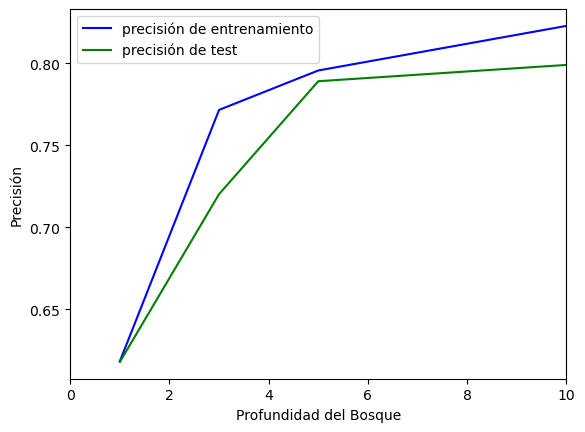

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(max_depth, train_scores.mean(axis=1), 'b', label="precisión de entrenamiento")
plt.plot(max_depth, test_scores.mean(axis=1), 'g', label="precisión de test")
plt.ylabel('Precisión')
plt.xlabel('Profundidad del Bosque')
plt.xlim([0, 10])
plt.legend(loc="best");

In [35]:
# Observe que la curva nos muestra un punto en donde nuestra precision de test y entrenamiento se 
# estabiliza.

# Entrene el modelo usando Validacion Cruzada y GridSearch. 
# Seleccione el mejor Fold según su criterio.

# Busque los mejores hiperparametros para 
# RandomForestClassifier
# Hiperparametros
#       max_depth
#       n_estimators



Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......max_depth=5, n_estimators=5;, score=0.545 total time=   0.0s
[CV 2/10] END ......max_depth=5, n_estimators=5;, score=0.768 total time=   0.0s
[CV 3/10] END ......max_depth=5, n_estimators=5;, score=0.768 total time=   0.0s
[CV 4/10] END ......max_depth=5, n_estimators=5;, score=0.818 total time=   0.0s
[CV 5/10] END ......max_depth=5, n_estimators=5;, score=0.727 total time=   0.0s
[CV 6/10] END ......max_depth=5, n_estimators=5;, score=0.737 total time=   0.0s
[CV 7/10] END ......max_depth=5, n_estimators=5;, score=0.788 total time=   0.0s
[CV 8/10] END ......max_depth=5, n_estimators=5;, score=0.778 total time=   0.0s
[CV 9/10] END ......max_depth=5, n_estimators=5;, score=0.758 total time=   0.0s
[CV 10/10] END .....max_depth=5, n_estimators=5;, score=0.667 total time=   0.0s
[CV 1/10] END .....max_depth=5, n_estimators=10;, score=0.747 total time=   0.0s
[CV 2/10] END .....max_depth=5, n_estimators=1

0.8170731707317073

In [38]:
# Muestre los mejores valores obtenidos en la busqueda de GridSearchCV



0.8080808080808082
{'max_depth': 10, 'n_estimators': 25}


<div class="alert alert-danger">
    En comparación con los resultados presentados en el Notebook 7 se han presentado mejoras en la predicción. Investigue otros hiperparametros y agreguelos en la busqueda de GridSearchCV. Pruebe con otros Folds en busqueda de mejorar el rendimiento del modelo.
</div>

## Machine Learning - Aprendizaje Supervisado
### Regresion

Apoyese en el Notebook **5. Apredizaje Supervizado 2**.

Se creará un modelo de predicción del valor medio de las casas en Califonornia.

In [40]:
# Use el dataset California Housing
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [41]:
# Revise los keys del dataset



dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [42]:
# Cree la matriz de caracteristicas y el vector de etiquetas



In [46]:
# Revice los nombre de las caracterisiticas y de la etiqueta



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [47]:
# Cree los conjuntos de Train y Test. Recuerde que estamos trabajando con regresion
# por lo tanto, no se usa particion estratificada (No hay clases)



In [ ]:
# Use cualquiera de estos dos estimadores para crear el modelo
# Pruebe con cual obtiene mejores resultados
#    LinearRegression
#    KNeighborsRegressor
#    RandomForestRegressor



In [ ]:
# Implemente una busqueda de hiperparametros con validacion cruzada para este dataset
# Recuerde buscar el mejor Fold
# La configuracion de busqueda de hiperparametros que elija puede llevar a tiempos de ejecucion
# basstante grandes.



Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END ....max_depth=10, n_estimators=10;, score=0.783 total time=   0.8s
[CV 2/10] END ....max_depth=10, n_estimators=10;, score=0.782 total time=   0.8s
[CV 3/10] END ....max_depth=10, n_estimators=10;, score=0.775 total time=   0.8s
[CV 4/10] END ....max_depth=10, n_estimators=10;, score=0.776 total time=   0.8s
[CV 5/10] END ....max_depth=10, n_estimators=10;, score=0.747 total time=   0.8s
[CV 6/10] END ....max_depth=10, n_estimators=10;, score=0.748 total time=   0.8s
[CV 7/10] END ....max_depth=10, n_estimators=10;, score=0.764 total time=   0.8s
[CV 8/10] END ....max_depth=10, n_estimators=10;, score=0.758 total time=   0.8s
[CV 9/10] END ....max_depth=10, n_estimators=10;, score=0.768 total time=   0.8s
[CV 10/10] END ...max_depth=10, n_estimators=10;, score=0.771 total time=   0.8s
[CV 1/10] END ....max_depth=10, n_estimators=15;, score=0.793 total time=   1.3s
[CV 2/10] END ....max_depth=10, n_estimators=1

In [ ]:
# Muestre nuevamente el mejor score y los mejores parametros

